In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
import geopandas as gpd

In [6]:
def reformat_prepped(prepped,seq_len,partition,llo_groups,scenario='Baseline'):
    x_data = prepped[f'x_{partition}'][:,-seq_len:,:]
    shape_x = x_data.shape
    x_data = x_data.reshape(shape_x[0]*shape_x[1],shape_x[2])
    x_data = x_data*prepped['x_std']+prepped['x_mean']
    dates= prepped[f'times_{partition}'][:,-seq_len:,:].reshape(shape_x[0]*shape_x[1])
    seg_ids = prepped[f'ids_{partition}'][:,-seq_len:,:].reshape(shape_x[0]*shape_x[1])
    x_vars = prepped['x_vars']
    df = pd.DataFrame(columns=x_vars, data=x_data)
    df['date']=pd.to_datetime(dates)
    df['month']=df['date'].dt.month
    df['sg_d_nt']=seg_ids
    if np.isin(scenario, ['Coastal','Headwaters','Appalachians']):
        if np.isin(partition,['trn','val']):
            df = df[~df.sg_d_nt.isin(llo_groups.seg_id_nat[llo_groups.test_group == scenario])]
        elif partition == 'tst':
            df = df[df.sg_d_nt.isin(llo_groups.seg_id_nat[llo_groups.test_group == scenario])]
    return df

def calc_diff_temp(tst,trn):
    return tst['seg_tave_air'][tst.month.isin([6,7,8])].median()-trn['seg_tave_air'][trn.month.isin([6,7,8])].median()

def calc_diff_precip(tst,trn):
    return tst['seg_rain'].median()-trn['seg_rain'].median()

In [25]:
llo_groups = pd.read_csv('data_DRB/DRB_spatial/llo_groups.csv')
llo_groups.loc[llo_groups.test_group == 'Piedmont', 'test_group']='Headwaters'
llo_groups.loc[llo_groups.test_group == 'Coastal_Plains', 'test_group']='Coastal'
llo_groups['test_group'].unique()

array(['Coastal', 'Appalachians', 'Headwaters'], dtype=object)

In [27]:
baseline_trn = reformat_prepped(np.load("results/baseline/GWN/prepped.npz"),15,'trn',llo_groups)
lto_max_trn = reformat_prepped(np.load("results/LTO/max/GWN/prepped.npz"),15,'trn', llo_groups)
drought_trn = reformat_prepped(np.load("results/Drought/GWN/prepped.npz"),15,'trn', llo_groups)
app_trn = reformat_prepped(np.load("results/LLO/appalachians/GWN/prepped.npz"),15,'trn',llo_groups, 'Appalachians')
head_trn = reformat_prepped(np.load("results/LLO/piedmont/GWN/prepped.npz"),15,'trn',llo_groups, 'Headwaters') #Piedmont misslabled in prep script, need to correct
coast_trn = reformat_prepped(np.load("results/LLO/coastal/GWN/prepped.npz"),15,'trn',llo_groups, 'Coastal')

baseline_val = reformat_prepped(np.load("results/baseline/GWN/prepped.npz"),15,'val', llo_groups)
lto_max_val = reformat_prepped(np.load("results/LTO/max/GWN/prepped.npz"),15,'val', llo_groups)
drought_val = reformat_prepped(np.load("results/Drought/GWN/prepped.npz"),15,'val', llo_groups)
app_val = reformat_prepped(np.load("results/LLO/appalachians/GWN/prepped.npz"),15,'val', llo_groups, 'Appalachians')
head_val = reformat_prepped(np.load("results/LLO/piedmont/GWN/prepped.npz"),15,'val', 'Headwaters') #Piedmont misslabled in prep script, need to correct
coast_val = reformat_prepped(np.load("results/LLO/coastal/GWN/prepped.npz"),15,'val', 'Coastal')

baseline_tst = reformat_prepped(np.load("results/baseline/GWN/prepped.npz"),15,'tst', llo_groups)
lto_max_tst = reformat_prepped(np.load("results/LTO/max/GWN/prepped.npz"),15,'tst', llo_groups)
drought_tst = reformat_prepped(np.load("results/Drought/GWN/prepped.npz"),15,'tst', llo_groups)
app_tst = reformat_prepped(np.load("results/LLO/appalachians/GWN/prepped.npz"),15,'tst',llo_groups, 'Appalachians')
head_tst = reformat_prepped(np.load("results/LLO/piedmont/GWN/prepped.npz"),15,'tst',llo_groups, 'Headwaters') #Piedmont misslabled in prep script, need to correct
coast_tst = reformat_prepped(np.load("results/LLO/coastal/GWN/prepped.npz"),15,'tst', llo_groups, 'Coastal')

In [28]:
base_diff = calc_diff_temp(baseline_tst,baseline_trn)
max_diff= calc_diff_temp(lto_max_tst,lto_max_trn)
drought_diff = calc_diff_temp(drought_tst,drought_trn)

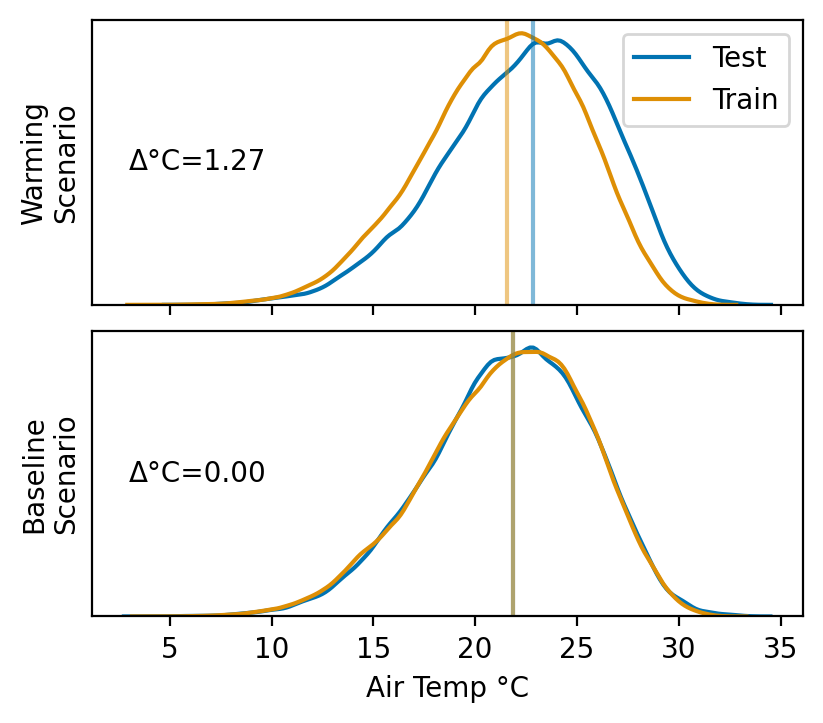

In [29]:
plt.style.use('default')
plt.style.use('seaborn-colorblind')

pal = list(sns.color_palette('colorblind',4))

fig, ax = plt.subplots(2,1,figsize=(4,3.5), constrained_layout=True, dpi=200,sharey=True,sharex=True)

#sns.kdeplot(lto_min['seg_tave_air'][lto_min.month.isin([6,7,8])],ax=ax[0],label=f'Test',color = pal[0])
#sns.kdeplot(lto_min_trn['seg_tave_air'][lto_min_trn.month.isin([6,7,8])],ax=ax[0],label=f'Train',color = pal[1])
#ax[0].axvline(lto_min['seg_tave_air'][lto_min.month.isin([6,7,8])].median(),color=pal[0], alpha = .5)
#ax[0].axvline(lto_min_trn['seg_tave_air'][lto_min_trn.month.isin([6,7,8])].median(),color = pal[1],alpha=.5)
#ax[0].set_title('Train Hot/Test Cold')
#ax[0].set_ylabel('')

sns.kdeplot(lto_max_tst['seg_tave_air'][lto_max_tst.month.isin([6,7,8])],ax=ax[0],label=f'Test',color = pal[0])
sns.kdeplot(lto_max_trn['seg_tave_air'][lto_max_trn.month.isin([6,7,8])],ax=ax[0],label=f'Train',color = pal[1])
#ax[0].set_title('')
ax[0].axvline(lto_max_tst['seg_tave_air'][lto_max_tst.month.isin([6,7,8])].median(),color=pal[0], alpha = .5)
ax[0].axvline(lto_max_trn['seg_tave_air'][lto_max_trn.month.isin([6,7,8])].median(),color = pal[1],alpha=.5)
ax[0].set_ylabel('Warming\nScenario')

sns.kdeplot(baseline_tst['seg_tave_air'][baseline_tst.month.isin([6,7,8])],ax=ax[1],label=f'Test',color = pal[0])
sns.kdeplot(baseline_trn['seg_tave_air'][baseline_trn.month.isin([6,7,8])],ax=ax[1],label=f'Train',color = pal[1])
#ax[1].set_title('')
ax[1].axvline(baseline_tst['seg_tave_air'][baseline_tst.month.isin([6,7,8])].median(),color=pal[0], alpha = .5)
ax[1].axvline(baseline_trn['seg_tave_air'][baseline_trn.month.isin([6,7,8])].median(),color = pal[1],alpha=.5)
ax[1].set_ylabel('Baseline\nScenario')

ax[1].set_xlabel('Air Temp °C')
ax[1].annotate(f'Δ°C={base_diff:.2f}', xy=(3,.05))
ax[0].annotate(f'Δ°C={max_diff:.2f}', xy=(3,.05))
#ax[0].annotate(f'Δ°C={min_diff:.2f}', xy=(3,.05))

plt.yticks([])
ax[0].legend(loc='upper right')
plt.savefig('results/figures/temp_distributions_warming_baseline.png',dpi=200)

In [30]:
def reformat_precip(scenario1,scenario2,name1,name2):
    scenario1['run']=name1
    scenario2['run']=name2
    df = pd.concat([scenario1,scenario2],ignore_index=True)
    df['year'] = temp_df.date.dt.year.where(temp_df.date.dt.month < 10,temp_df.date.dt.year + 1)
    df = drought_df.groupby(['run','year','date']).mean().groupby(['run','year']).sum()

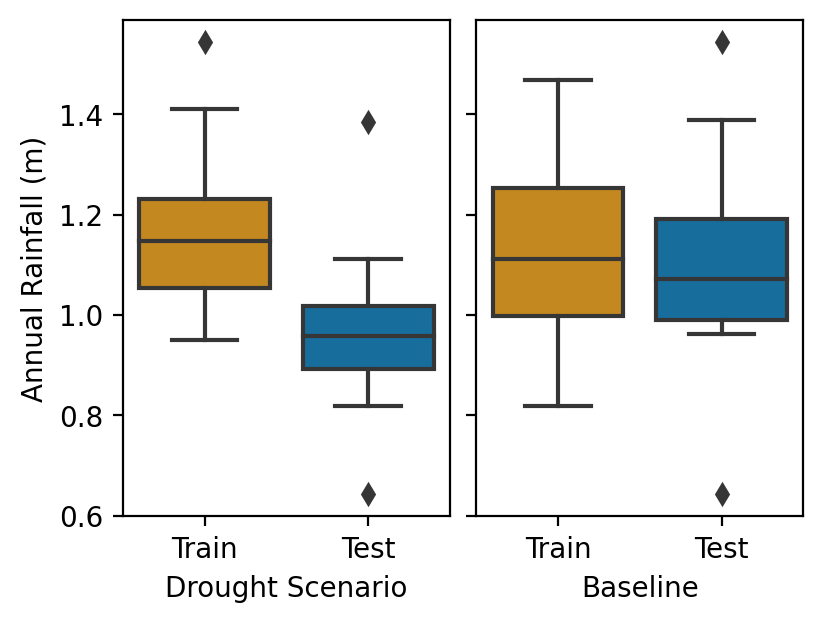

In [31]:
def reformat_precip(tst,trn):
    tst['Partition']='Test'
    trn['Partition']='Train'
    df = pd.concat([tst,trn],ignore_index=True)
    df['year']=df.date.dt.year.where(df.date.dt.month < 10,df.date.dt.year + 1)
    df = df.groupby(['Partition','year','date']).mean().groupby(['Partition','year']).sum()
    return df.reset_index()

   
fig, ax = plt.subplots(1,2,figsize=(4,3),dpi=200,constrained_layout=True,sharey=True,sharex=True)
sns.boxplot(data=reformat_precip(drought_tst,drought_trn), x='Partition', y='seg_rain',ax=ax[0],order=['Train','Test'], palette=[pal[1],pal[0]])#,label=f'Drought',color = pal[0])
ax[0].set_ylabel('Annual Rainfall (m)')
ax[0].set_xlabel('Drought Scenario')

sns.boxplot(data=reformat_precip(baseline_tst,baseline_trn), x='Partition', y='seg_rain',ax=ax[1],order=['Train','Test'], palette=[pal[1],pal[0]])
ax[1].set_ylabel('')
ax[1].set_xlabel('Baseline')
plt.savefig('results/figures/precip_distributions_warming_baseline.png',dpi=200)

In [32]:
precip_df = reformat_precip(drought_tst,drought_trn)

In [33]:
precip_df.groupby(['Partition']).median()

,year,seg_slope,seg_elev,seg_width_mean,seg_tave_air,seginc_swrad,seg_rain,seginc_potet,month,sg_d_nt
Partition,,,,,,,,,,
Test,1990.5,1.803479,54072.800659,11372.766421,3707.604290,53501.858438,0.958978,32.002281,2382.0,739019.10989
Train,1999.0,1.803479,54072.800659,11372.766421,3747.586891,52970.176983,1.147006,31.816809,2382.0,739019.10989


In [34]:
def my_styler_correct(s):
    if s.name[1]=='Test':
        return ["background-color: #AAAAAA"] * len(s)
    elif s.name[1]=='Train':
        return ["background-color: #CCCCCC"] * len(s)
    else:
        return ["background-color: #EEEEEE"] * len(s)
    
def format_run_tables(trn,val,tst,run):
    ## Train
    trn = (trn.describe()[['seg_slope','seg_elev','seg_width_mean','seg_tave_air','seginc_swrad','seg_rain','seginc_potet']].filter(items=['min','25%','50%','75%','max'],axis=0)
           .assign(Partition='Train'))
    
    tst = (tst.describe()[['seg_slope','seg_elev','seg_width_mean','seg_tave_air','seginc_swrad','seg_rain','seginc_potet']].filter(items=['min','25%','50%','75%','max'],axis=0)
           .assign(Partition='Test'))
    
    val = (val.describe()[['seg_slope','seg_elev','seg_width_mean','seg_tave_air','seginc_swrad','seg_rain','seginc_potet']].filter(items=['min','25%','50%','75%','max'],axis=0)
           .assign(Partition='Val'))

    table_out = (pd.concat([trn,tst,val])
                     .rename(columns={'seg_slope':'Slope (m/km)','seg_elev':'Elevation (m)','seg_width_mean':'Mean Width (m)',
                          'seg_tave_air':'Air Temp. (°C)','seginc_swrad':'SW Rad. (W/sq.m)','seg_rain':'Precip. (cm)','seginc_potet':'Potential ET (cm)'})
                     .assign(**{'Precip. (cm)':(lambda x: x['Precip. (cm)']*100)},
                             **{'Potential ET (cm)':(lambda x: x['Potential ET (cm)']*100)})
                     .round(3)
                     .reset_index()
                     .assign(Percentile=lambda x:pd.Categorical(x['index'],ordered=True, categories = ['min','25%','50%','75%','max']))
                     .drop(columns=['index'])
                     .pivot(columns=['Partition'],index=['Percentile']))
    
    table_styled = table_out.style.apply(my_styler_correct).format(precision=2).set_caption(run).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('weight', 'bold'),
        ('font-size', '18px')
        ]
    }])

    #dfi.export(table_styled, f'results/figures/{run}_summary.png', table_conversion='matplotlib')
    return table_styled


In [35]:
format_run_tables(baseline_trn,baseline_val,baseline_tst, 'Baseline')

In [36]:
format_run_tables(lto_max_trn,lto_max_val,lto_max_tst,'Warming')

In [37]:
format_run_tables(drought_trn,drought_val,drought_tst,'Drought')

In [38]:
format_run_tables(app_trn,app_val,app_tst,'Appalachians')

In [39]:
format_run_tables(head_trn,head_val,head_tst, 'Headwaters')

In [40]:
format_run_tables(coast_trn,coast_val,coast_tst,'Coastal')  

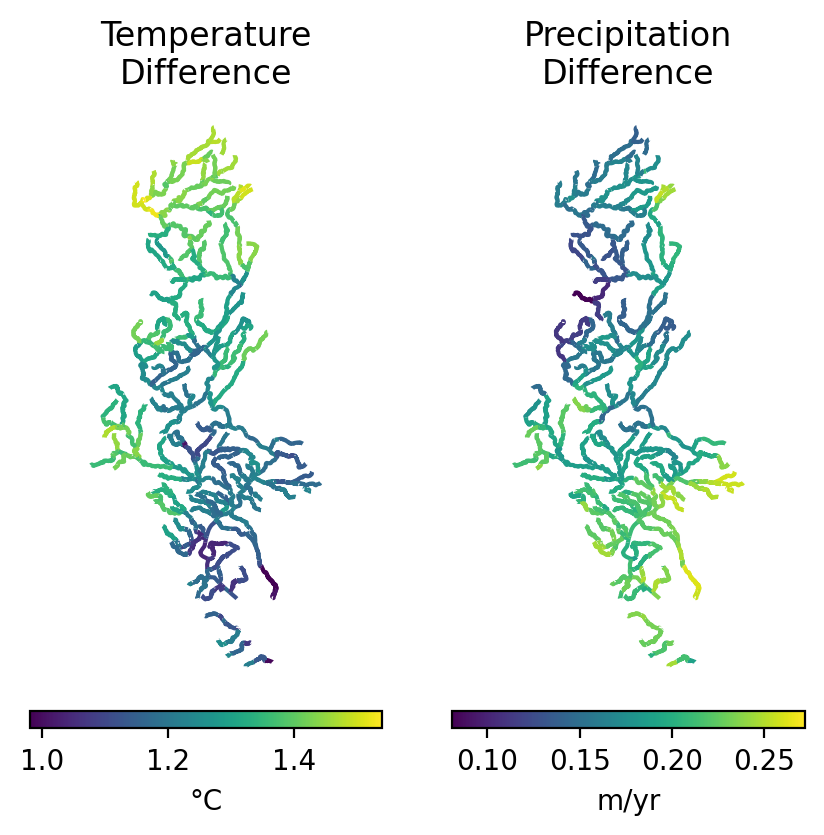

In [64]:
segs = gpd.read_file('data_DRB/DRB_spatial/segs/segs.shp')

def calc_diff_seg(tst,trn):
    tst_seg = tst[['seg_tave_air','sg_d_nt']].loc[tst.month.isin([6,7,8])].groupby(['sg_d_nt']).median()
    trn_seg = trn[['seg_tave_air','sg_d_nt']].loc[trn.month.isin([6,7,8])].groupby(['sg_d_nt']).median()
    return tst_seg-trn_seg

def calc_diff_seg_drought(tst,trn):
    tst['year']=tst.date.dt.year.where(tst.date.dt.month < 10,tst.date.dt.year + 1)
    trn['year']=trn.date.dt.year.where(trn.date.dt.month < 10,trn.date.dt.year + 1)
    tst_seg = tst[['year','sg_d_nt','seg_rain']].groupby(['year','sg_d_nt']).sum().groupby(['sg_d_nt']).median()
    trn_seg = trn[['year','sg_d_nt','seg_rain']].groupby(['year','sg_d_nt']).sum().groupby(['sg_d_nt']).median()
    diff = -1*(tst_seg-trn_seg)
    return diff

temp_diff_seg = calc_diff_seg(lto_max_tst,lto_max_trn)
temp_diff_sf = temp_diff_seg.reset_index().merge(segs).set_geometry('geometry')
fig, ax = plt.subplots(1,2,figsize=(5,5.5),dpi=200)

temp_diff_sf.plot(column='seg_tave_air',ax=ax[0],legend=True, legend_kwds={"label":"°C", 'location':'bottom','anchor':(0.5,2)})

ax[0].set_axis_off()
ax[0].set_title('Temperature\nDifference')

drought_diff_seg = calc_diff_seg_drought(drought_tst, drought_trn)
drought_diff_sf = drought_diff_seg.reset_index().merge(segs).set_geometry('geometry')

drought_diff_sf.plot(column='seg_rain',ax=ax[1],legend=True,legend_kwds={"label":"m/yr", 'location':'bottom','anchor':(0.5,2)})
ax[1].set_axis_off()
ax[1].set_title('Precipitation\nDifference')
plt.savefig('results/figures/trn_tst_precip_temp_diff.png')


'Train'